# Rechecking ampselfcal after Feb reruns


In [125]:
noisedir = "/orange/adamginsburg/ALMA_IMF/reduction/reduction/noise_estimation_regions/"

In [126]:
from spectral_cube import SpectralCube

In [127]:
import warnings
import spectral_cube
warnings.simplefilter('ignore', spectral_cube.utils.BeamWarning)
warnings.simplefilter('ignore', spectral_cube.utils.StokesWarning)
warnings.simplefilter('ignore', spectral_cube.utils.PossiblySlowWarning)
warnings.simplefilter('ignore', spectral_cube.utils.WCSWarning)

In [181]:
%matplotlib inline
import numpy as np
from astropy import units as u
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)
pl.style.use('dark_background')
pl.rcParams['image.origin'] = 'lower'
import sys
import glob
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/reduction/')
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import spectral_cube
from astropy.visualization import simple_norm
import regions
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [211]:
def compare_withamp_withoutamp(withamp, withoutamp, noisereg, zoom=slice(None), max_percent=99.9, min_percent=None, stretch='asinh',
                               noise_threshold=3, shrink=0.85, cmap='viridis', diffnorm=None):
    noamp = SpectralCube.read(withoutamp).to(u.mJy)
    withamp = SpectralCube.read(withamp).to(u.mJy)
    
    
    reg = regions.read_ds9(noisereg)
    
    noise_noamp = noamp.subcube_from_regions(reg).mad_std()
    noise_withamp = withamp.subcube_from_regions(reg).mad_std()
    print(f"Noise w/o: {noise_noamp:0.6g}")
    print(f"Noise with: {noise_withamp:0.6g}")
    print(f"Fractional difference: {(noise_noamp-noise_withamp)/noise_noamp}")
    
    mask = (noamp > noise_noamp*noise_threshold) & (withamp > noise_withamp*noise_threshold)
    ratio = (noamp/withamp).with_mask(mask)
    print(f"Flux ratio (no amp / with amp) 25%: {ratio.percentile(25)}  50%: {ratio.median()}  75%: {ratio.percentile(75)}")
    
    fig,((ax1,ax2,ax3)) = pl.subplots(1,3, figsize=(16,5))
    norm = simple_norm(noamp[0].value[zoom], max_percent=max_percent, min_percent=min_percent, stretch=stretch)
    im = ax1.imshow(noamp[0].value[zoom], norm=norm, cmap=cmap)
    
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = fig.colorbar(mappable=im, ax=ax1, cax=cax)
    cb.set_label(r'S$_\nu$ [mJy beam$^{-1}$]')
    
    ax1.set_title("No amp selfcal")
    im = ax2.imshow(withamp[0].value[zoom], norm=norm, cmap=cmap)

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = fig.colorbar(mappable=im, ax=ax2, cax=cax)
    cb.set_label(r'S$_\nu$ [mJy beam$^{-1}$]')
    
    ax2.set_title("With amp selfcal")
    diff = (noamp[0].value-withamp[0].value)[zoom]
    #im = ax3.imshow(diff, norm=simple_norm(diff, min_percent=1, max_percent=99, stretch='asinh'), cmap=cmap)
    im = ax3.imshow(diff, cmap=cmap, norm=diffnorm)
    
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = fig.colorbar(mappable=im, ax=ax3, cax=cax)
    cb.set_label(r'S$_\nu$ [mJy beam$^{-1}$]')
    
    ax3.set_title("No amp - With amp")
    
    for ax in (ax1,ax2,ax3):
        ax.set_xticks([])
        ax.set_yticks([])
    #pl.subplots_adjust(hspace=0.05, wspace=0.05)
    
    return noamp, withamp, ratio

In [212]:
reldir = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release/"

In [213]:
rstimresdir = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults"
decdir = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/December2020Release/"

In [214]:
imdir = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/imaging_results/"

In [215]:
ls -d /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release//G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal*image.tt0

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release//G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0/


Noise w/o: 0.0852354 mJy
Noise with: 0.0834627 mJy
Fractional difference: 0.020798679666961847
Flux ratio (no amp / with amp) 25%: 0.9719708561897278  50%: 1.021201729774475  75%: 1.117600440979004


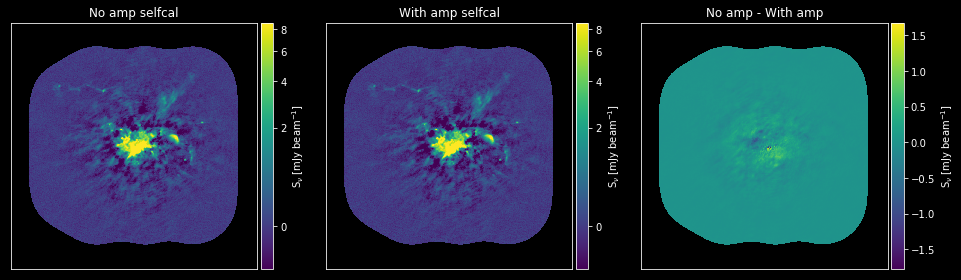

In [216]:
_=compare_withamp_withoutamp(withoutamp=f'{reldir}/G010.62/B6/cleanest/G010.62_B6_uid___A001_X1296_X1db_continuum_merged_12M_robust0_selfcal5_finaliter.image.tt0.fits',
                             withamp=f'{imdir}/G010.62_B6_uid___A001_X1296_X1db_continuum_merged_12M_robust0_selfcal4.image.tt0.fits',
                             noisereg=f"{noisedir}/G010.62_B6_noise_sampling.reg",
                             max_percent=99.5,
                             min_percent=1,
                             stretch='asinh'
                             
                            )

In [217]:
ls /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release//G010.62/B3/cleanest

G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_dirty_preselfcal.image.tt0/
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_dirty_preselfcal.image.tt1/
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_dirty_preselfcal.model.tt0/
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_dirty_preselfcal.model.tt1/
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_dirty_preselfcal.psf.tt0/
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_dirty_preselfcal.psf.tt1/
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_dirty_preselfcal.residual.tt0/
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_dirty_preselfcal.residual.tt1/
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_preselfcal_finalmodel.image.tt0/
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_preselfcal_finalmodel.image.tt0.fits
G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_preselfcal_finalmodel.

Noise w/o: 0.0946582 mJy
Noise with: 0.0594815 mJy
Fractional difference: 0.3716174591951395
Flux ratio (no amp / with amp) 25%: 0.9424992203712463  50%: 1.0086246728897095  75%: 1.1714239120483398


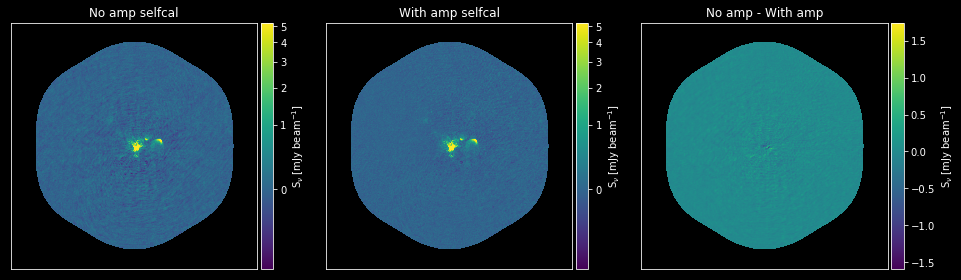

In [218]:
_=compare_withamp_withoutamp(withamp=f'{reldir}/G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.fits',
                           withoutamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7.image.tt0.fits',
                           noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                          )

Noise w/o: 0.0946582 mJy
Noise with: 0.0594815 mJy
Fractional difference: 0.3716174591951395
Flux ratio (no amp / with amp) 25%: 0.9424992203712463  50%: 1.0086246728897095  75%: 1.1714239120483398


/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


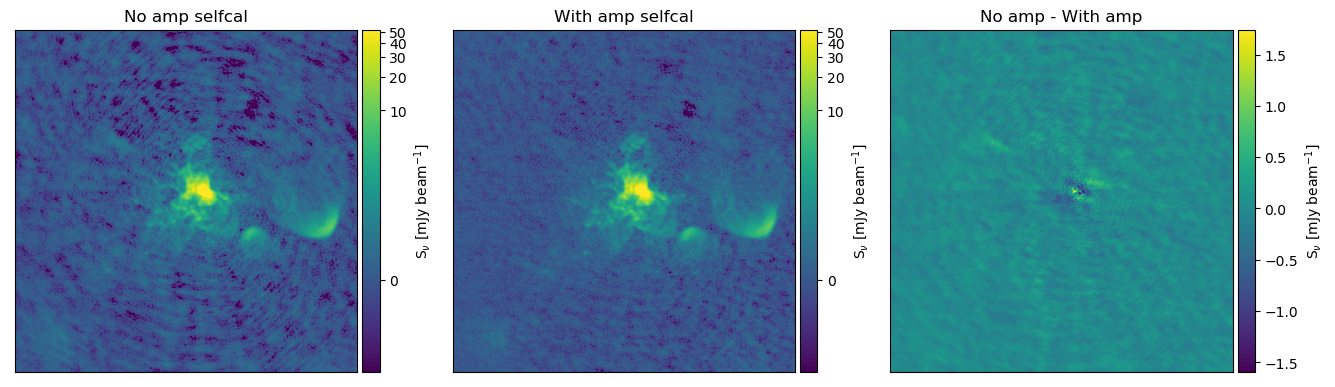

In [219]:
with pl.style.context('default'):
    _=compare_withamp_withoutamp(withamp=f'{reldir}/G010.62/B3/cleanest/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.fits',
                               withoutamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7.image.tt0.fits',
                               noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                                 cmap='viridis',
                               zoom=(slice(1000,-1000), slice(1000,-1000)),
                               max_percent=99.9,
                               stretch='log',
                               min_percent=1)
    pl.savefig('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/paper_figures/G010.62_B3_before_vs_after_amselfcal_zoom.pdf', bbox_inches='tight')

_=compare_withamp_withoutamp(withamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal8.image.tt0.fits',
                             withoutamp=f'{imdir}/G010.62_B3_uid___A001_X1296_X1e5_continuum_merged_12M_robust0_selfcal7.image.tt0.fits',
                             noisereg=f"{noisedir}/G010.62_B3_noise_sampling.reg",
                             zoom=(slice(1000,-1000), slice(1000,-1000)),
                             max_percent=99.9,
                             stretch='log',
                             min_percent=1)

In [220]:
glob.glob(f"{reldir}/G333.60/B3/cleanest/G333.60_B3_uid___A001_X1296_X1a3_continuum_merged_12M_robust0_selfcal*image.tt0")

['/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release//G333.60/B3/cleanest/G333.60_B3_uid___A001_X1296_X1a3_continuum_merged_12M_robust0_selfcal6_finaliter.image.tt0']

Noise w/o: 0.139147 mJy
Noise with: 0.135075 mJy
Fractional difference: 0.02926928209488287
Flux ratio (no amp / with amp) 25%: 1.0027506351470947  50%: 1.027970552444458  75%: 1.0777089595794678


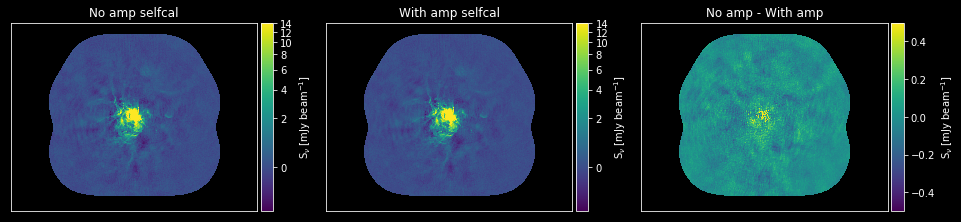

In [226]:
_=compare_withamp_withoutamp(withamp=f"{reldir}/G333.60/B3/cleanest/G333.60_B3_uid___A001_X1296_X1a3_continuum_merged_12M_robust0_selfcal6_finaliter.image.tt0.fits",
                               withoutamp=f'{imdir}/G333.60_B3_uid___A001_X1296_X1a3_continuum_merged_12M_robust0_selfcal5.image.tt0.fits',
                           noisereg=f"{noisedir}/G333.60_B3_noise_sampling.reg",
                             max_percent=99.5,
                             diffnorm=simple_norm(data=[0,1], min_cut=-0.5, max_cut=0.5)
                          )

Noise w/o: 0.139147 mJy
Noise with: 0.135075 mJy
Fractional difference: 0.02926928209488287
Flux ratio (no amp / with amp) 25%: 1.0027506351470947  50%: 1.027970552444458  75%: 1.0777089595794678


(SpectralCube with shape=(1, 3000, 3920) and unit=mJy:
  n_x:   3920  type_x: RA---SIN  unit_x: deg    range:   245.479580 deg:  245.598451 deg
  n_y:   3000  type_y: DEC--SIN  unit_y: deg    range:   -50.129394 deg:  -50.071080 deg
  n_s:      1  type_s: FREQ      unit_s: Hz     range: 98615464371.690 Hz:98615464371.690 Hz,
 SpectralCube with shape=(1, 3000, 3920) and unit=mJy:
  n_x:   3920  type_x: RA---SIN  unit_x: deg    range:   245.479580 deg:  245.598451 deg
  n_y:   3000  type_y: DEC--SIN  unit_y: deg    range:   -50.129394 deg:  -50.071080 deg
  n_s:      1  type_s: FREQ      unit_s: Hz     range: 98615464371.690 Hz:98615464371.690 Hz,
 SpectralCube with shape=(1, 3000, 3920):
  n_x:   3920  type_x: RA---SIN  unit_x: deg    range:   245.479580 deg:  245.598451 deg
  n_y:   3000  type_y: DEC--SIN  unit_y: deg    range:   -50.129394 deg:  -50.071080 deg
  n_s:      1  type_s: FREQ      unit_s: Hz     range: 98615464371.690 Hz:98615464371.690 Hz)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


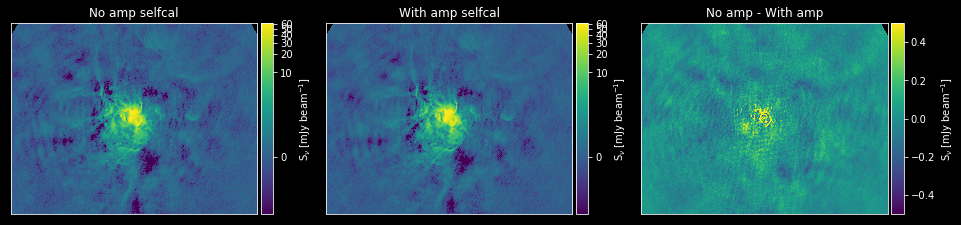

In [229]:
compare_withamp_withoutamp(withamp=f"{reldir}/G333.60/B3/cleanest/G333.60_B3_uid___A001_X1296_X1a3_continuum_merged_12M_robust0_selfcal6_finaliter.image.tt0.fits",
                           withoutamp=f'{imdir}/G333.60_B3_uid___A001_X1296_X1a3_continuum_merged_12M_robust0_selfcal5.image.tt0.fits',
                           noisereg=f"{noisedir}/G333.60_B3_noise_sampling.reg",
                           zoom=(slice(600,-600), slice(800,-800)),
                           max_percent=99.9,
                           stretch='log',
                           diffnorm=simple_norm(data=[0,1], min_cut=-0.5, max_cut=0.5),                     
                           min_percent=1)

Noise w/o: 0.119141 mJy
Noise with: 0.114712 mJy
Fractional difference: 0.037167893639182305
Flux ratio (no amp / with amp) 25%: 0.9693527668714523  50%: 1.0173394680023193  75%: 1.1574791073799133


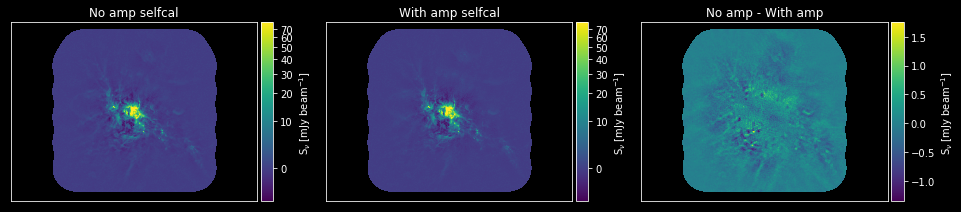

In [230]:
_=compare_withamp_withoutamp(withamp=f"{reldir}/G333.60/B6/cleanest/G333.60_B6_uid___A001_X1296_X19b_continuum_merged_12M_robust0_selfcal6_finaliter.image.tt0.fits",
                             withoutamp=f'{imdir}/G333.60_B6_uid___A001_X1296_X19b_continuum_merged_12M_robust0_selfcal5.image.tt0.fits',
                             noisereg=f"{noisedir}/G333.60_B6_noise_sampling.reg"
                            )

Noise w/o: 0.187392 mJy
Noise with: 0.175808 mJy
Fractional difference: 0.06181722729942512
Flux ratio (no amp / with amp) 25%: 0.9829449951648712  50%: 1.0062874555587769  75%: 1.030359536409378


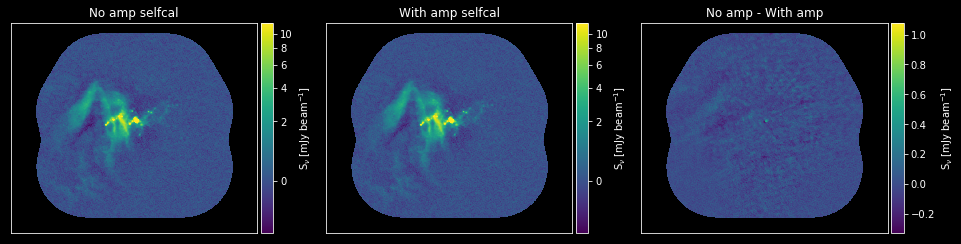

In [231]:
_=compare_withamp_withoutamp(withoutamp=f"{reldir}/G353.41/B3/cleanest/G353.41_B3_uid___A001_X1296_X1d5_continuum_merged_12M_robust0_selfcal6_finaliter.image.tt0.fits",
                           withamp=f"{decdir}/G353.41/B3/cleanest/G353.41_B3_uid___A001_X1296_X1d5_continuum_merged_12M_robust0_selfcal6_finaliter.image.tt0.fits",
                           noisereg=f"{noisedir}/G353.41_B3_noise_sampling.reg",
                           #zoom=(slice(300,-300), slice(600,-600)),
                           #max_percent=99.9,
                           #stretch='log',
                           #min_percent=0
                          )

Noise w/o: 0.418046 mJy
Noise with: 0.40756 mJy
Fractional difference: 0.02508352472765285
Flux ratio (no amp / with amp) 25%: 0.9928571283817291  50%: 1.0246727466583252  75%: 1.0493897795677185


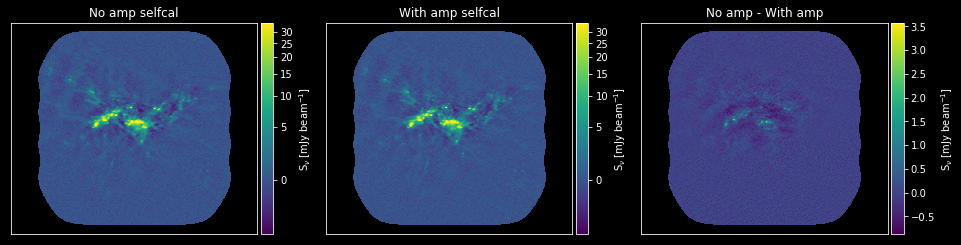

In [232]:
_=compare_withamp_withoutamp(withamp=f"{decdir}/G353.41/B6/cleanest/G353.41_B6_uid___A001_X1296_X1c9_continuum_merged_12M_robust0_selfcal6_finaliter.image.tt0.fits",
                           withoutamp=f"{reldir}/G353.41/B6/cleanest/G353.41_B6_uid___A001_X1296_X1c9_continuum_merged_12M_robust0_selfcal6_finaliter.image.tt0.fits",
                           noisereg=f"{noisedir}/G353.41_B6_noise_sampling.reg",
                           #zoom=(slice(300,-300), slice(600,-600)),
                           #max_percent=99.9,
                           #stretch='log',
                           #min_percent=0
                          )

Noise w/o: 0.0317187 mJy
Noise with: 0.036066 mJy
Fractional difference: -0.13705640944649072
Flux ratio (no amp / with amp) 25%: 0.8016194701194763  50%: 0.8419809937477112  75%: 0.8994202166795731


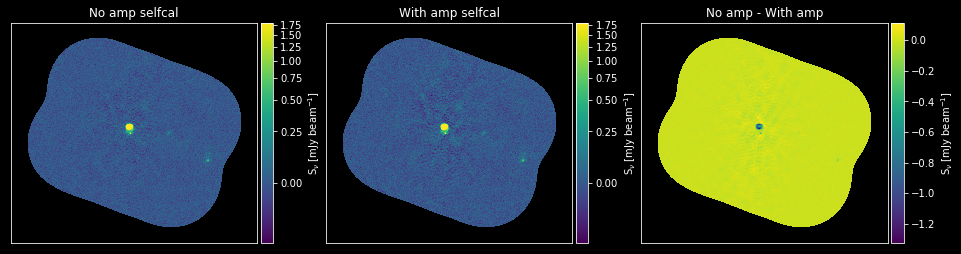

In [233]:
noamp, withamp, ratio = compare_withamp_withoutamp(
    withamp=f"{decdir}/W43-MM3/B3/cleanest/W43-MM3_B3_uid___A001_X1296_X12f_continuum_merged_12M_robust0_selfcal5_finaliter.image.tt0.fits",
    withoutamp=f"{reldir}/W43-MM3/B3/cleanest/W43-MM3_B3_uid___A001_X1296_X12f_continuum_merged_12M_robust0_selfcal5_finaliter.image.tt0.fits",
    noisereg=f"{noisedir}/W43-MM3_B3_noise_sampling.reg",
    #zoom=(slice(300,-300), slice(300,-300)),
    #max_percent=99.9,
    #stretch='log',
    #min_percent=1,
)

Noise w/o: 0.317795 mJy
Noise with: 0.221494 mJy
Fractional difference: 0.3030302756444249
Flux ratio (no amp / with amp) 25%: 0.984500452876091  50%: 1.0065069198608398  75%: 1.0380683243274689


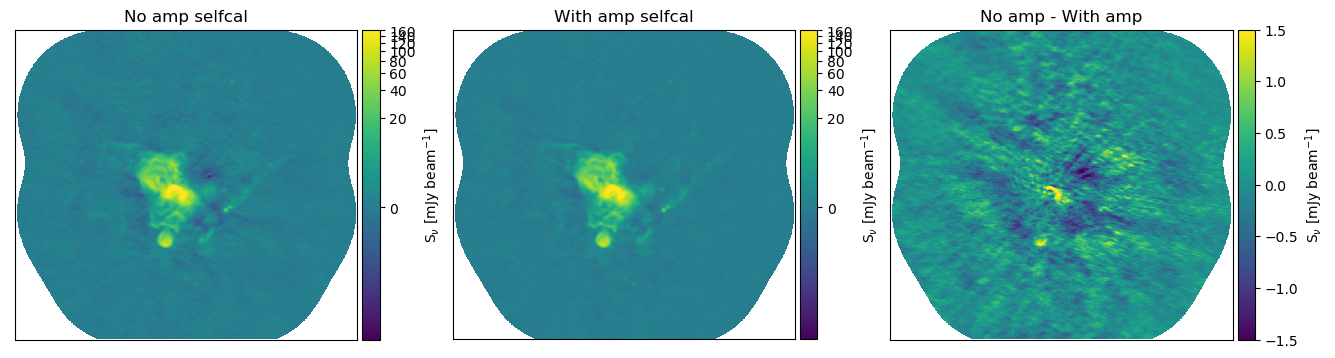

In [250]:
with pl.style.context('default'):
    noamp, withamp, ratio = compare_withamp_withoutamp(
        withoutamp=f"{rstimresdir}/G012.80/B3/cleanest/G012.80_B3_uid___A001_X1296_X1fb_continuum_merged_12M_robust0_selfcal6.image.tt0.fits",
        withamp=f"{reldir}/G012.80/B3/cleanest/G012.80_B3_uid___A001_X1296_X1fb_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.fits",
        noisereg=f"{noisedir}/G012.80_B3_noise_sampling.reg",
        zoom=(slice(100,-100), slice(60,-60)),
        #max_percent=99.9,
        stretch='log',
        #min_percent=1,
        diffnorm=simple_norm([0,1], min_cut=-1.5, max_cut=1.5)
    )
pl.savefig('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/paper_figures/G012.80_B3_before_vs_after_amselfcal_zoom.pdf', bbox_inches='tight')    

Noise w/o: 0.725209 mJy
Noise with: 0.620935 mJy
Fractional difference: 0.1437855430323731
Flux ratio (no amp / with amp) 25%: 0.8877884596586227  50%: 0.9738045930862427  75%: 1.044960379600525


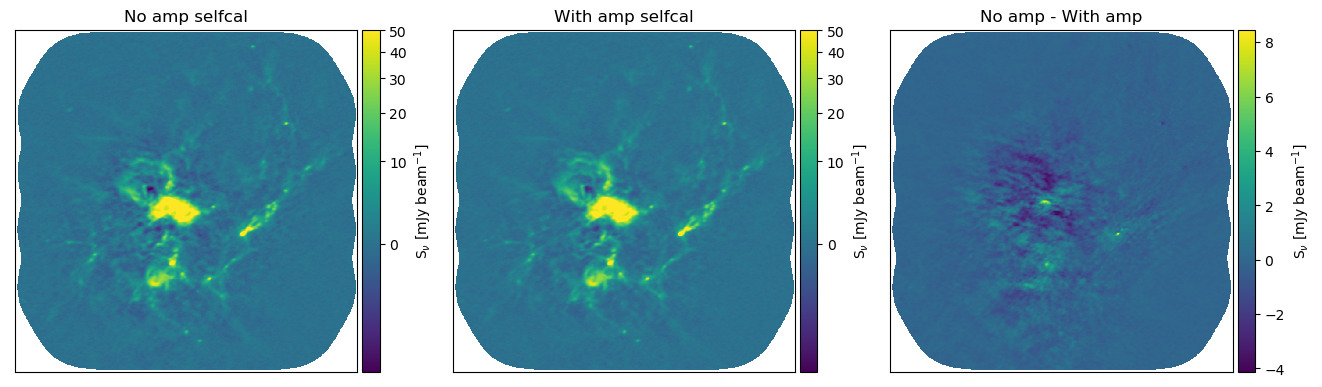

In [248]:
with pl.style.context('default'):
    noamp, withamp, ratio = compare_withamp_withoutamp(
        withamp=   f"{decdir}/G012.80/B6/cleanest/G012.80_B6_uid___A001_X1296_X1ef_continuum_merged_12M_robust0_selfcal5_finaliter.image.tt0.fits",
        withoutamp=f"{reldir}/G012.80/B6/cleanest/G012.80_B6_uid___A001_X1296_X1ef_continuum_merged_12M_robust0_selfcal5_finaliter.image.tt0.fits",
        noisereg=  f"{noisedir}/G012.80_B6_noise_sampling.reg",
        zoom=(slice(50,-50), slice(50,-50)),
        max_percent=99.5,
        #stretch='log',
        #min_percent=1,
    )
pl.savefig('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/paper_figures/G012.80_B6_before_vs_after_amselfcal_zoom.pdf', bbox_inches='tight')    

Noise w/o: 0.110821 mJy
Noise with: 0.0946762 mJy
Fractional difference: 0.14568640856449652
Flux ratio (no amp / with amp) 25%: 0.9682392776012421  50%: 1.0172874927520752  75%: 1.0829904079437256


/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


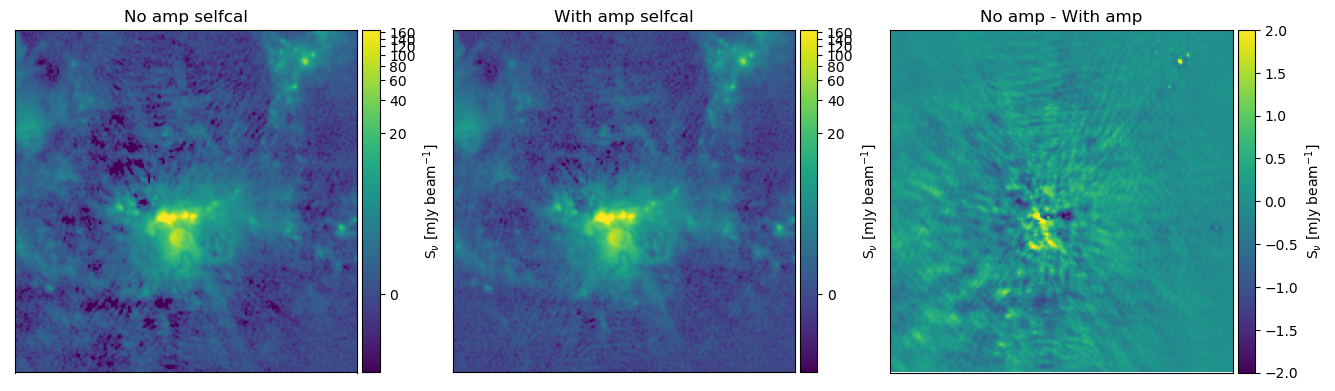

In [247]:
with pl.style.context('default'):
    noamp, withamp, ratio = compare_withamp_withoutamp(
        withamp=        f"{reldir}/W51-IRS2/B6/cleanest/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.fits",
        withoutamp=f"{rstimresdir}/W51-IRS2/B6/cleanest/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal8.image.tt0.fits",
        noisereg=     f"{noisedir}/W51-IRS2_B6_noise_sampling.reg",
        zoom=(slice(300,-300), slice(300,-300)),
        max_percent=99.9,
        stretch='log',
        min_percent=1,
        diffnorm=simple_norm([0,1], min_cut=-2, max_cut=2)
    )
    pl.savefig('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/paper_figures/W51-IRS2_B6_before_vs_after_amselfcal_zoom.pdf', bbox_inches='tight')    